# Load Modules


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [2]:
import zipfile

zip_path = "C:\\Users\\anish\\Downloads\\archive (2).zip"
extract_path = "C:\\Users\\anish\\Downloads\\archive (2)"  # Specify the directory to extract the files

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [3]:
import cv2
import os
import zipfile

dataset_zip_path = r"C:\\Users\\anish\\Downloads\\archive (2).zip"
extracted_folder_path = r"C:\\Users\\anish\\Downloads\\archive (2)\\Training"

# Extract the contents of the ZIP file to the specified folder
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

classes = {'no_tumor': 0, 'pituitary_tumor': 1}

X = []  # List to store image data
Y = []  # List to store corresponding labels

for cls in classes:
    pth = os.path.join(extracted_folder_path, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, 0)  # Read the image in grayscale
        img = cv2.resize(img, (200, 200))  # Resize the image to (200, 200)
        X.append(img)  # Append the image to X list
        Y.append(classes[cls])  # Append the corresponding label to Y list


In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:

pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize data 

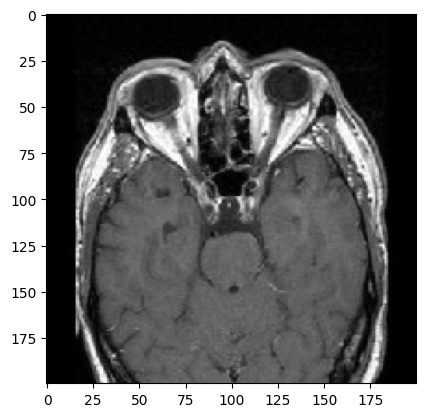

In [8]:
plt.imshow(X[0], cmap='gray')

# Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data 

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection: PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [15]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

# Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [19]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [20]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


# Prediction

In [21]:
pred = sv.predict(xtest)

In [22]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [23]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


# TEST MODEL

In [24]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

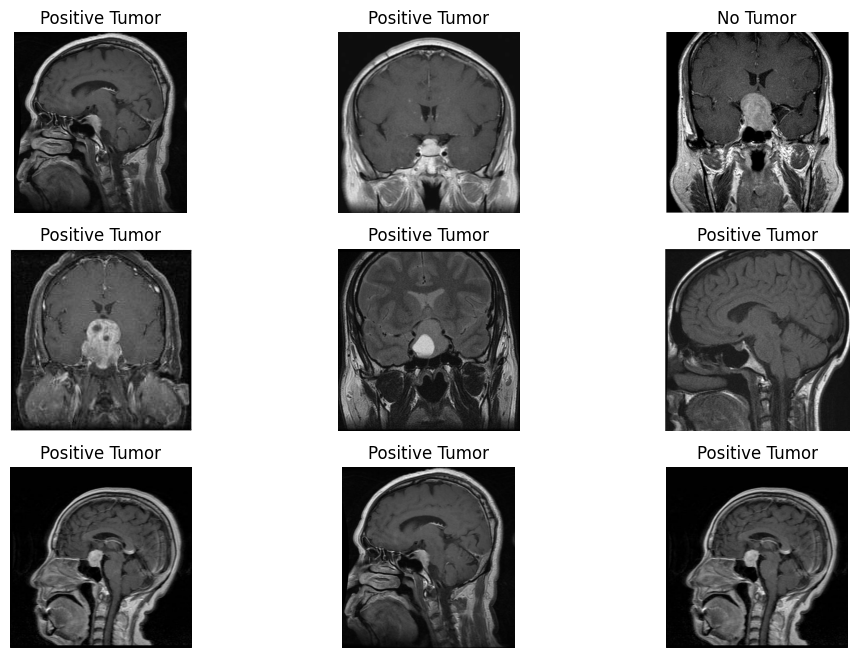

In [25]:
import cv2
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir("C:\\Users\\anish\\Downloads\\archive (2)\\Testing\\pituitary_tumor")[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread("C:\\Users\\anish\\Downloads\\archive (2)\\Testing\\pituitary_tumor\\" + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    
    # Replace sv.predict with your prediction code
    p = sv.predict(img1)
    
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

dataset_train_path = r"C:\\Users\\anish\\Downloads\\archive (2)\\Training"
dataset_test_path = r"C:\\Users\\anish\\Downloads\\archive (2)\\Testing"




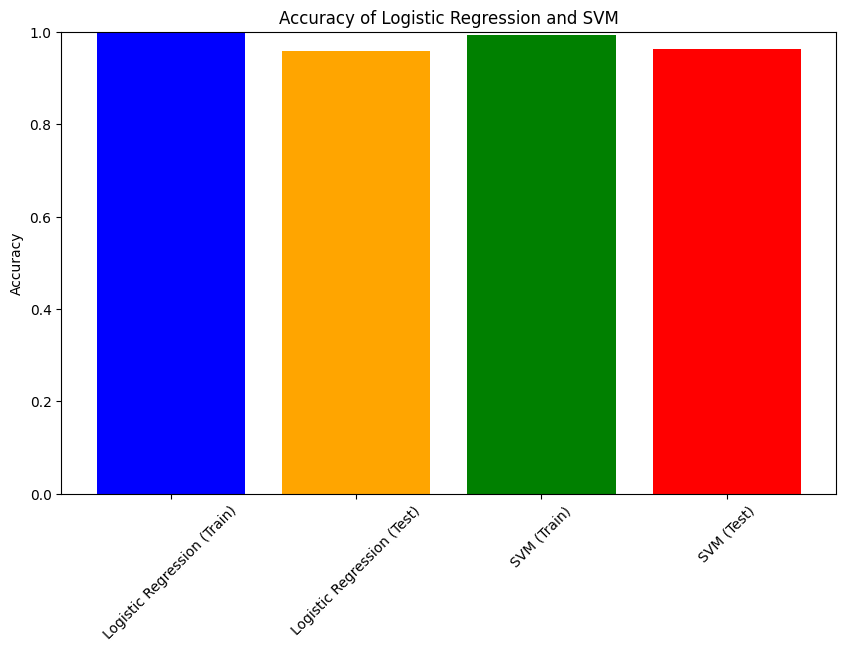

In [26]:
import matplotlib.pyplot as plt

# Accuracy scores
lg_train_accuracy = lg.score(xtrain, ytrain)
lg_test_accuracy = lg.score(xtest, ytest)
sv_train_accuracy = sv.score(xtrain, ytrain)
sv_test_accuracy = sv.score(xtest, ytest)

# Plotting
labels = ['Logistic Regression (Train)', 'Logistic Regression (Test)', 'SVM (Train)', 'SVM (Test)']
scores = [lg_train_accuracy, lg_test_accuracy, sv_train_accuracy, sv_test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy of Logistic Regression and SVM')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [32]:
# SCORES OF VARIOUS METRICS

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions
lg_pred_train = lg.predict(xtrain)
lg_pred_test = lg.predict(xtest)
sv_pred_train = sv.predict(xtrain)
sv_pred_test = sv.predict(xtest)

# Metrics
lg_train_precision = precision_score(ytrain, lg_pred_train)
lg_test_precision = precision_score(ytest, lg_pred_test)
sv_train_precision = precision_score(ytrain, sv_pred_train)
sv_test_precision = precision_score(ytest, sv_pred_test)

lg_train_recall = recall_score(ytrain, lg_pred_train)
lg_test_recall = recall_score(ytest, lg_pred_test)
sv_train_recall = recall_score(ytrain, sv_pred_train)
sv_test_recall = recall_score(ytest, sv_pred_test)

lg_train_f1 = f1_score(ytrain, lg_pred_train)
lg_test_f1 = f1_score(ytest, lg_pred_test)
sv_train_f1 = f1_score(ytrain, sv_pred_train)
sv_test_f1 = f1_score(ytest, sv_pred_test)

# Displaying metrics
print("Logistic Regression Metrics:")
print("Training Precision:", lg_train_precision)
print("Testing Precision:", lg_test_precision)
print("Training Recall:", lg_train_recall)
print("Testing Recall:", lg_test_recall)
print("Training F1 Score:", lg_train_f1)
print("Testing F1 Score:", lg_test_f1)
print("\n")

print("SVM Metrics:")
print("Training Precision:", sv_train_precision)
print("Testing Precision:", sv_test_precision)
print("Training Recall:", sv_train_recall)
print("Testing Recall:", sv_test_recall)
print("Training F1 Score:", sv_train_f1)
print("Testing F1 Score:", sv_test_f1)


Logistic Regression Metrics:
Training Precision: 1.0
Testing Precision: 0.9529411764705882
Training Recall: 1.0
Testing Recall: 0.9878048780487805
Training F1 Score: 1.0
Testing F1 Score: 0.9700598802395209


SVM Metrics:
Training Precision: 0.9910313901345291
Testing Precision: 0.9640718562874252
Training Recall: 1.0
Testing Recall: 0.9817073170731707
Training F1 Score: 0.9954954954954955
Testing F1 Score: 0.972809667673716


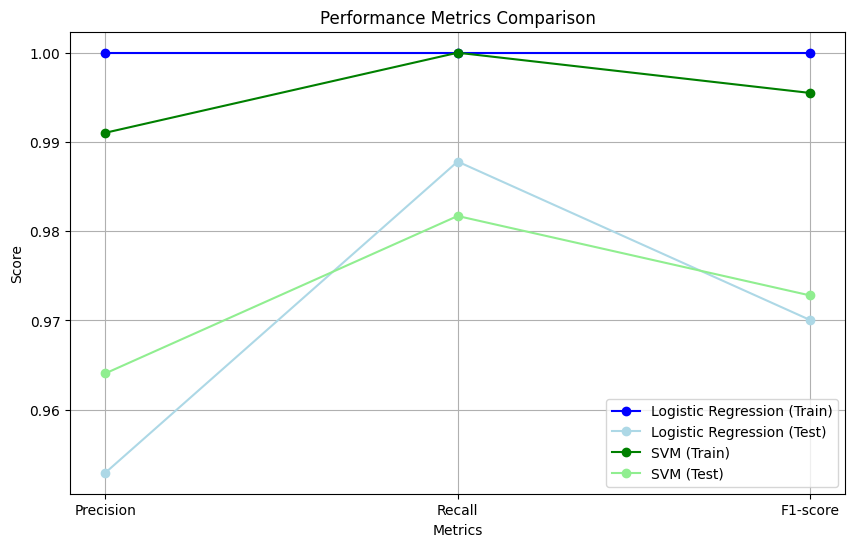

In [31]:
import matplotlib.pyplot as plt

# Define metrics and their scores
metrics = ['Precision', 'Recall', 'F1-score']
lg_train_scores = [lg_train_precision, lg_train_recall, lg_train_f1]
lg_test_scores = [lg_test_precision, lg_test_recall, lg_test_f1]
sv_train_scores = [sv_train_precision, sv_train_recall, sv_train_f1]
sv_test_scores = [sv_test_precision, sv_test_recall, sv_test_f1]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting lines for Logistic Regression
plt.plot(metrics, lg_train_scores, marker='o', color='blue', label='Logistic Regression (Train)')
plt.plot(metrics, lg_test_scores, marker='o', color='lightblue', label='Logistic Regression (Test)')

# Plotting lines for SVM
plt.plot(metrics, sv_train_scores, marker='o', color='green', label='SVM (Train)')
plt.plot(metrics, sv_test_scores, marker='o', color='lightgreen', label='SVM (Test)')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [34]:
# Calculate average scores for each algorithm on the testing set
lg_avg_test_score = (lg_test_precision + lg_test_recall + lg_test_f1) / 3
sv_avg_test_score = (sv_test_precision + sv_test_recall + sv_test_f1) / 3

# Compare average scores
if lg_avg_test_score > sv_avg_test_score:
    print("Logistic Regression performs better on the testing set.")
    best_algorithm = "Logistic Regression"
    best_scores = [lg_test_precision, lg_test_recall, lg_test_f1]
else:
    print("SVM performs better on the testing set.")
    best_algorithm = "SVM"
    best_scores = [sv_test_precision, sv_test_recall, sv_test_f1]

# Print the average scores for the best algorithm
print("Average Precision for", best_algorithm + ":", best_scores[0])
print("Average Recall for", best_algorithm + ":", best_scores[1])
print("Average F1-score for", best_algorithm + ":", best_scores[2])


SVM performs better on the testing set.
Average Precision for SVM: 0.9640718562874252
Average Recall for SVM: 0.9817073170731707
Average F1-score for SVM: 0.972809667673716
